In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Students Social Media Addiction.csv")
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [2]:
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [3]:
from scipy import stats

In [4]:
numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)
print(f"Jumlah outliers terdeteksi: {outliers.sum()}")

Jumlah outliers terdeteksi: 0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

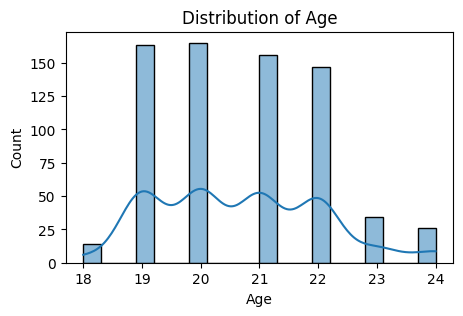

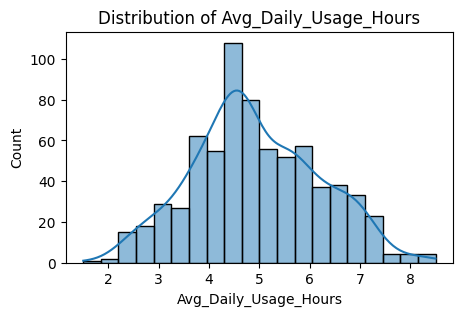

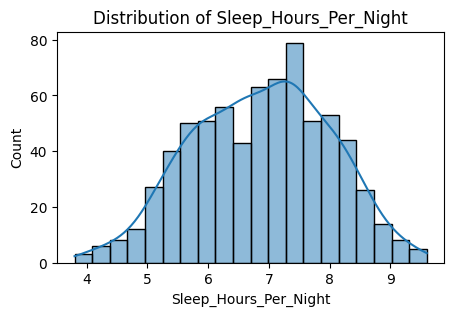

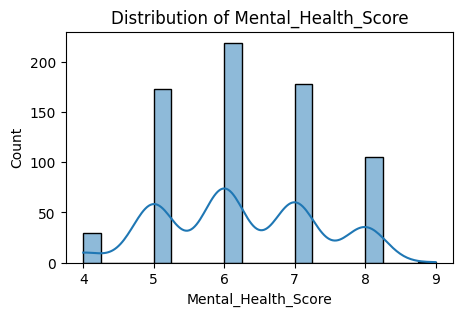

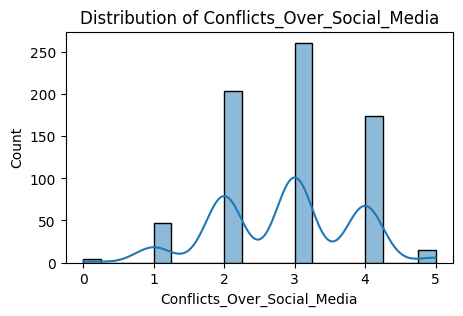

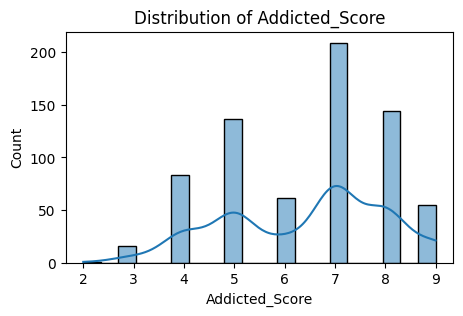

In [6]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

In [7]:
target = 'Most_Used_Platform'
print(df[target].value_counts())

Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64


In [8]:
df = df.drop(columns=['Student_ID'])
df

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [9]:
country_freq = df['Country'].value_counts(normalize=False)
df['Country_FE'] = df['Country'].map(country_freq)
df = df.drop(columns=['Country'])

In [10]:
X = df.drop(columns=['Most_Used_Platform'])
y = df['Most_Used_Platform']

In [11]:
from sklearn.model_selection import train_test_split
from collections import Counter


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
print("Distribusi sebelum oversampling:", Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("Distribusi setelah oversampling:", Counter(y_train_resampled))

Distribusi sebelum oversampling: Counter({'Instagram': 199, 'TikTok': 123, 'Facebook': 98, 'WhatsApp': 43, 'Twitter': 24, 'LinkedIn': 17, 'WeChat': 12, 'LINE': 10, 'VKontakte': 10, 'KakaoTalk': 10, 'Snapchat': 10, 'YouTube': 8})
Distribusi setelah oversampling: Counter({'WhatsApp': 199, 'Instagram': 199, 'Facebook': 199, 'TikTok': 199, 'LINE': 199, 'Twitter': 199, 'WeChat': 199, 'VKontakte': 199, 'KakaoTalk': 199, 'LinkedIn': 199, 'Snapchat': 199, 'YouTube': 199})


C:\Users\I Putu Nanda Aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\I Putu Nanda Aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [15]:
def add_complex_features(df):
    # Ratio / interaction features
    df['Usage_per_Sleep'] = df['Avg_Daily_Usage_Hours'] / df['Sleep_Hours_Per_Night']
    df['Addicted_per_Mental'] = df['Addicted_Score'] / df['Mental_Health_Score']
    df['Conflict_per_Usage'] = df['Conflicts_Over_Social_Media'] / df['Avg_Daily_Usage_Hours']

    # Binary status
    df['Is_Graduate'] = (df['Academic_Level'] == 'Graduate').astype(int)
    df['Is_Undergraduate'] = (df['Academic_Level'] == 'Undergraduate').astype(int)
    df['Is_Single'] = (df['Relationship_Status'] == 'Single').astype(int)

    # Interaction categorical
    df['Gender_Academic'] = df['Gender'] + '_' + df['Academic_Level']
    df['Academic_Relationship'] = df['Academic_Level'] + '_' + df['Relationship_Status']

    # Bucket fitur numerik
    df['Age_Group'] = pd.cut(
        df['Age'], bins=[17,19,21,24], labels=[0,1,2]
    ).astype(int)

    df['Sleep_Low'] = (df['Sleep_Hours_Per_Night'] < 6).astype(int)

    return df

In [16]:
X_train_resampled = add_complex_features(X_train_resampled.copy())
X_test = add_complex_features(X_test.copy())

In [17]:
X_test

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,...,Usage_per_Sleep,Addicted_per_Mental,Conflict_per_Usage,Is_Graduate,Is_Undergraduate,Is_Single,Gender_Academic,Academic_Relationship,Age_Group,Sleep_Low
367,22,Male,Graduate,6.0,Yes,6.2,6,Single,3,7,...,0.967742,1.166667,0.500000,1,0,1,Male_Graduate,Graduate_Single,2,0
94,23,Male,Graduate,2.4,No,7.4,8,Complicated,1,4,...,0.324324,0.500000,0.416667,1,0,0,Male_Graduate,Graduate_Complicated,2,0
597,20,Male,Undergraduate,6.4,Yes,6.2,5,Single,4,8,...,1.032258,1.600000,0.625000,0,1,1,Male_Undergraduate,Undergraduate_Single,1,0
569,21,Male,Graduate,4.2,Yes,8.0,7,Single,3,6,...,0.525000,0.857143,0.714286,1,0,1,Male_Graduate,Graduate_Single,1,0
551,22,Male,Graduate,4.0,No,8.3,7,In Relationship,2,5,...,0.481928,0.714286,0.500000,1,0,0,Male_Graduate,Graduate_In Relationship,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,20,Female,Undergraduate,5.2,Yes,6.9,6,Single,3,7,...,0.753623,1.166667,0.576923,0,1,1,Female_Undergraduate,Undergraduate_Single,1,0
392,19,Female,Undergraduate,4.2,Yes,7.7,7,Single,3,6,...,0.545455,0.857143,0.714286,0,1,1,Female_Undergraduate,Undergraduate_Single,0,0
320,19,Female,Undergraduate,5.2,Yes,6.8,6,Single,3,7,...,0.764706,1.166667,0.576923,0,1,1,Female_Undergraduate,Undergraduate_Single,0,0
404,19,Female,Undergraduate,3.1,No,8.7,8,Single,2,4,...,0.356322,0.500000,0.645161,0,1,1,Female_Undergraduate,Undergraduate_Single,0,0


In [18]:
cat_features = [
    'Gender', 'Academic_Level', 'Affects_Academic_Performance',
    'Relationship_Status', 'Gender_Academic', 'Academic_Relationship'
]

In [19]:
cat_features

['Gender',
 'Academic_Level',
 'Affects_Academic_Performance',
 'Relationship_Status',
 'Gender_Academic',
 'Academic_Relationship']

In [22]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from catboost import CatBoostClassifier, Pool

In [23]:
from sklearn.utils.class_weight import compute_class_weight

In [24]:
classes = np.unique(y_train_resampled)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_resampled)
weights_dict = dict(zip(classes, weights))

In [25]:
ordered_weights = [weights_dict[c] for c in classes]
ordered_weights

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [26]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    class_weights=ordered_weights,
    random_state=42,
    verbose=100
)

In [27]:
model.fit(X_train_resampled, y_train_resampled, cat_features=cat_features)

0:	learn: 2.2827149	total: 266ms	remaining: 2m 12s
100:	learn: 0.3943347	total: 13.4s	remaining: 52.8s
200:	learn: 0.2686609	total: 25.8s	remaining: 38.4s
300:	learn: 0.2017609	total: 37.5s	remaining: 24.8s
400:	learn: 0.1675207	total: 49.5s	remaining: 12.2s
499:	learn: 0.1409947	total: 1m 1s	remaining: 0us


In [28]:
y_pred = model.predict(X_test)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {acc:.4f}")
print(f"Macro-F1 Score: {f1:.4f}")


=== Classification Report ===
              precision    recall  f1-score   support

    Facebook       0.62      0.60      0.61        25
   Instagram       0.85      0.68      0.76        50
   KakaoTalk       1.00      1.00      1.00         2
        LINE       1.00      1.00      1.00         2
    LinkedIn       0.60      0.75      0.67         4
    Snapchat       1.00      0.33      0.50         3
      TikTok       0.65      0.65      0.65        31
     Twitter       0.20      0.33      0.25         6
   VKontakte       0.40      1.00      0.57         2
      WeChat       1.00      1.00      1.00         3
    WhatsApp       0.92      1.00      0.96        11
     YouTube       0.33      1.00      0.50         2

    accuracy                           0.69       141
   macro avg       0.71      0.78      0.70       141
weighted avg       0.73      0.69      0.70       141

Accuracy: 0.6879
Macro-F1 Score: 0.7048


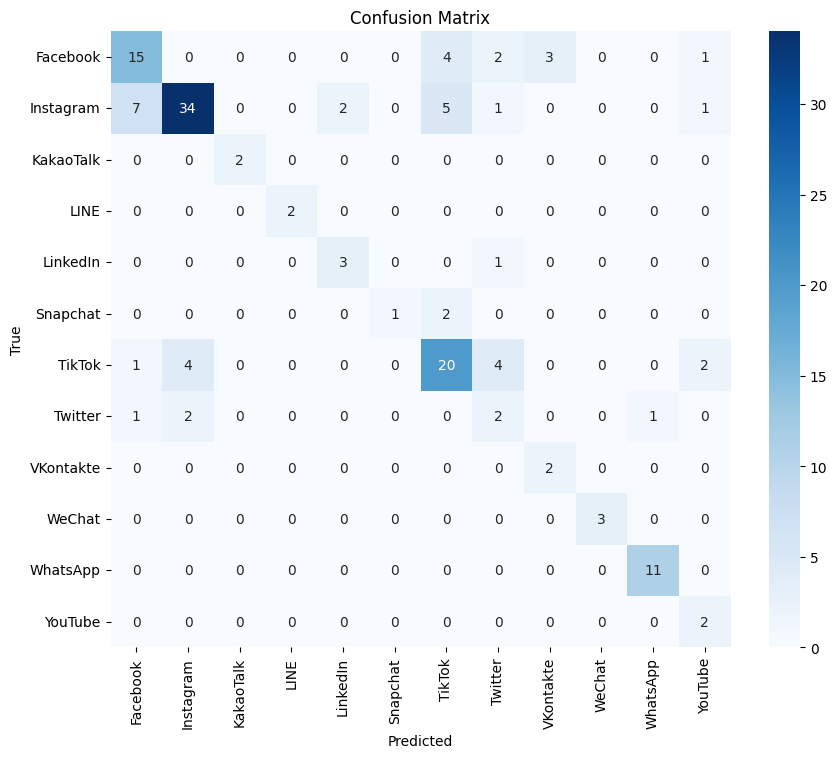

In [29]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
df

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Country_FE
0,19,Female,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,20
1,22,Male,Graduate,2.1,Twitter,No,7.5,8,Single,0,3,53
2,20,Female,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated,4,9,40
3,18,Male,High School,3.0,YouTube,No,7.0,7,Single,1,4,22
4,21,Male,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,34
...,...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,4.7,TikTok,No,7.2,7,In Relationship,2,5,21
701,23,Male,Graduate,6.8,Instagram,Yes,5.9,4,Single,5,9,21
702,21,Female,Undergraduate,5.6,WeChat,Yes,6.7,6,In Relationship,3,7,16
703,24,Male,Graduate,4.3,Twitter,No,7.5,8,Single,2,4,21


In [31]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [32]:
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [300, 500, 800],
    'l2_leaf_reg': [1, 3, 5]
}

In [33]:
model = CatBoostClassifier(
    random_state=42,
    verbose=0
)

In [34]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [35]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_macro',   # Karena multiclass imbalance, pakai macro-F1
    verbose=2,
    n_jobs=-1             # Gunakan semua core CPU
)

In [ ]:
grid_search.fit(
    X_train_resampled, y_train_resampled,
    cat_features=cat_features
)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
print("\n✅ Best params:", grid_search.best_params_)
print(f"✅ Best macro-F1 score (cv): {grid_search.best_score_:.4f}")